# App User Segmentation

## Import data, check null values, column info, and descriptive statistics of the data

In [2]:
import pandas as pd

file_path = 'userbehaviour.csv'
df = pd.read_csv(file_path)

null_values = df.isnull().sum()
info = df.info()
descriptive_stats = df.describe()

print("Null Values:\n", null_values)
print("\nColumn Info:\n", info)
print("\nDescriptive Statistics:\n", descriptive_stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB
Null Values:
 userid                        0
Average Screen Time           0
Average Spent on App (INR)    0
Left Review                   0
Ratings                       0
New Password Request          0
Last Visited Minutes          0
Status                   

## Check the highest, lowest, and average screen time of all the users

In [6]:
highest_screen_time = df['Average Screen Time'].max()
lowest_screen_time = df['Average Screen Time'].min()
average_screen_time = df['Average Screen Time'].mean()

print("Highest Screen Time:", highest_screen_time)
print("Lowest Screen Time:", lowest_screen_time)
print("Average Screen Time:", average_screen_time)

Highest Screen Time: 50.0
Lowest Screen Time: 0.0
Average Screen Time: 24.39039039039039


## Check the highest, lowest, and average amount spent by all the users

In [7]:
highest_spent = df['Average Spent on App (INR)'].max()
lowest_spent = df['Average Spent on App (INR)'].min()
average_spent = df['Average Spent on App (INR)'].mean()

print("Highest Amount Spent on App:", highest_spent)
print("Lowest Amount Spent on App:", lowest_spent)
print("Average Amount Spent on App:", average_spent)

Highest Amount Spent on App: 998.0
Lowest Amount Spent on App: 0.0
Average Amount Spent on App: 424.4154154154154


## Check the relationship between the spending capacity and screen time of the active users and the users who have uninstalled the app

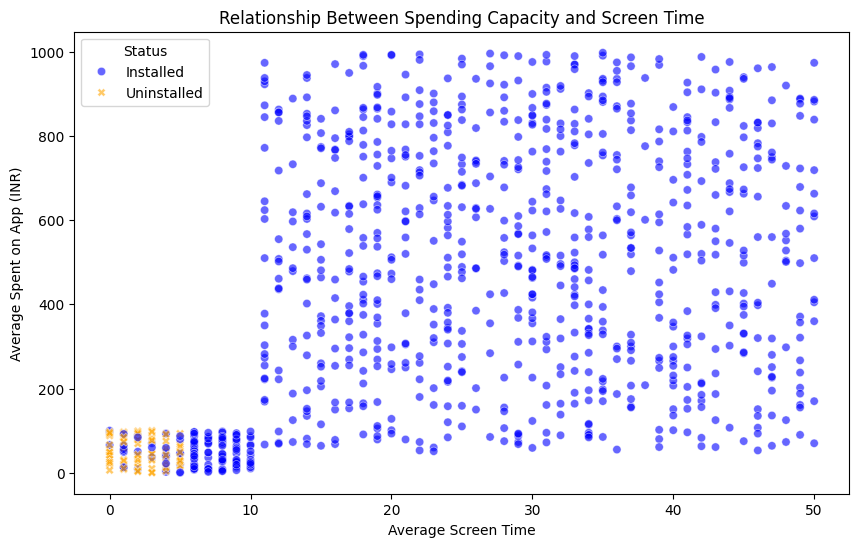

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Average Screen Time',
    y='Average Spent on App (INR)',
    hue='Status',
    style='Status',
    palette={'Installed': 'blue', 'Uninstalled': 'orange'},
    alpha=0.6
)
plt.title("Relationship Between Spending Capacity and Screen Time")
plt.show()


The scatter plot shows a clear connection between how much time users spend on the app and how much money they spend. Users who spend more time on the app tend to spend more money, and these users are also the ones most likely to keep the app installed.

On the other hand, users who eventually uninstall the app usually have lower screen time and spend very little, if anything at all. This suggests that low engagement and spending are strong factors that indicate that a user might leave.

In short, the more engaged a user is with the app, the more they spend, and the less likely they are to uninstall it.

## Check the relationship between the ratings given by users and the average screen time

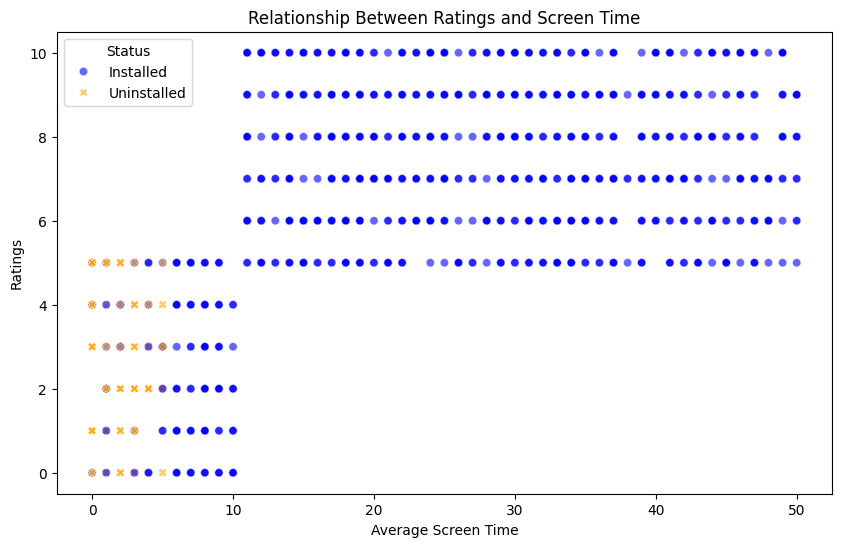

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Average Screen Time',
    y='Ratings',
    hue='Status',
    style='Status',
    palette={'Installed': 'blue', 'Uninstalled': 'orange'},
    alpha=0.6
)
plt.title("Relationship Between Ratings and Screen Time")
plt.show()


## App User segmentation using K-means clustering to find the users that the app retained and lost forever

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df[['Average Screen Time', 'Average Spent on App (INR)', 'Last Visited Minutes']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Segment'] = kmeans.fit_predict(X_scaled)

df['Segment'] = df['Segment'].map({0: 'Retained', 1: 'Needs Attention', 2: 'Churn'})

print(df['Segment'].value_counts())

Segment
Retained           591
Churn              335
Needs Attention     73
Name: count, dtype: int64


## Visualize the segments

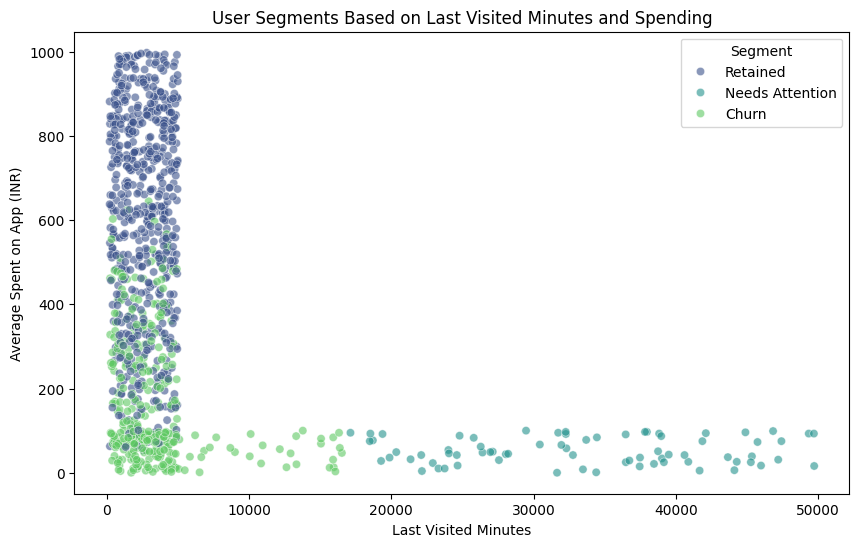

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Last Visited Minutes', y='Average Spent on App (INR)', hue='Segment', palette='viridis', alpha=0.6)
plt.title("User Segments Based on Last Visited Minutes and Spending")
plt.show()

##  Summary
In this analysis, we examined user behavior on an app using several key metrics, including screen time, spending, and ratings. Our findings revealed the following:
- **High Screen Time Correlates with Higher Spending**: Users who spend more time on the app tend to spend more money. This suggests that engagement is directly linked to monetization.
- **Uninstalled Users Have Lower Engagement**: Users who have uninstalled the app generally had lower screen time and spent less on the app.
- **User Segmentation via K-means**: We applied K-means clustering to categorize users into three segments: Retained, Needs Attention, and Churn. The retained users show high engagement and spending, while the churn segment has the lowest.
This segmentation helps identify which users are most at risk of leaving and may benefit from targeted retention strategies.